In [69]:
import os

import datashader as ds
import datashader.transfer_functions as tf
from datashader.utils import export_image
from datashader.transfer_functions import shade, dynspread, set_background, shade
from datashader.colors import viridis

import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.colorbar as cb
import matplotlib.colors as mcolors

import seaborn as sns

import colorcet as cc

import numpy as np

import geopandas as gpd

# Filtered and cleaned DataFrame
nawc_path = "/hub/datasets--elenagsierra--DivShift-NAWC/snapshots/776597b7e97e19b4d27fedd3583046d2f2c53c1a"
full_path = os.path.join(nawc_path, "filtered_results_California.csv")
df_ca = pd.read_csv(full_path)
df_ca = df_ca.dropna(subset=['latitude', 'longitude'])

#Functions
def add_scale_bar(ax, length_km=750, location=(0.05, 0.05), linewidth=3):
    # Convert km to degrees (approx; 1° lat ~ 111 km)
    length_deg = length_km / 111.0
    x_start = -124.5
    x_end = x_start + length_deg
    y = 32.5

    ax.plot([x_start, x_end], [y, y], color='black', lw=linewidth, transform=ax.transData)
    ax.text((x_start + x_end)/2, y + 0.3, f'{length_km} km', color='black',
            ha='center', va='bottom', fontsize=10)

In [70]:
#Load California shape file to add clear borders to observations
states = gpd.read_file("hf_env/cb_2022_us_state_500k.shp")
states.set_crs(epsg=4269, inplace=True)
california = states[states['NAME'] == 'California']
california = california.to_crs("EPSG:4326")

In [71]:
#Observation Density Plot

#Define canvas dimensions and geographic extent of California
canvas = ds.Canvas(plot_width=1500, plot_height=1500,
                   x_range=(-125, -114), y_range=(32, 43))

#Aggregate number of observations per pixel
agg = canvas.points(df_ca, 'longitude', 'latitude', agg=ds.count())

#Apply color shading using a blue gradient and linear scaling from 0 to 100 observations
img = shade(agg, cmap=colorcet.blues, span=[0, 100], how="linear")

#Initialize the matplotlib figure and axis
fig, ax = plt.subplots(figsize=(10, 10), dpi=300)

#Plot California state boundary as a black outline
california.boundary.plot(ax=ax, edgecolor='black', linewidth=0.2)

#Render the datashader image on the plot
ax.imshow(img.to_pil(), extent=[-125, -114, 32, 43])

#Add title and axis labels
ax.set_title("Observation Density")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
ax.grid(False)

#Create ScalarMappable for colorbar using the same colormap and value range
cmap = cc.cm['blues']
norm = mcolors.Normalize(vmin=0, vmax=100)
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])

#Add a 750 km scale bar to the bottom of the plot
add_scale_bar(ax, length_km=750)

#Draw a vertical colorbar to indicate observation density per pixel
cbar = fig.colorbar(sm, ax=ax, orientation="vertical", fraction=0.035, pad=0.02)
cbar.set_label("Observation Count per Pixel", fontsize=12)

#Final layout adjustment and display
plt.tight_layout()
plt.show()

In [73]:
#Human Footprint Plot

#Define canvas dimensions and geographic extent of California
canvas = ds.Canvas(plot_width=1500, plot_height=1500,
                   x_range=(-125, -114), y_range=(32, 43))

#Aggregate number of observations per pixel
agg = canvas.points(df_ca, 'longitude', 'latitude', agg=ds.count())

#Apply color shading using a blue gradient and linear scaling from 0 to 100 observations
img = shade(agg, cmap=colorcet.blues, span=[0, 100], how="linear")

#Initialize the matplotlib figure and axis
fig, ax = plt.subplots(figsize=(10, 10), dpi=300)

#Plot California state boundary as a black outline
california.boundary.plot(ax=ax, edgecolor='black', linewidth=0.2)

#Render the datashader image on the plot
ax.imshow(img.to_pil(), extent=[-125, -114, 32, 43])

#Add title and axis labels
ax.set_title("Observation Density")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
ax.grid(False)

#Create ScalarMappable for colorbar using the same colormap and value range
cmap = cc.cm['blues']
norm = mcolors.Normalize(vmin=0, vmax=100)
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])

#Add a 750 km scale bar to the bottom of the plot
add_scale_bar(ax, length_km=750)

#Draw a vertical colorbar to indicate observation density per pixel
cbar = fig.colorbar(sm, ax=ax, orientation="vertical", fraction=0.035, pad=0.02)
cbar.set_label("Observation Count per Pixel", fontsize=12)

#Final layout adjustment and display
plt.tight_layout()
plt.show()

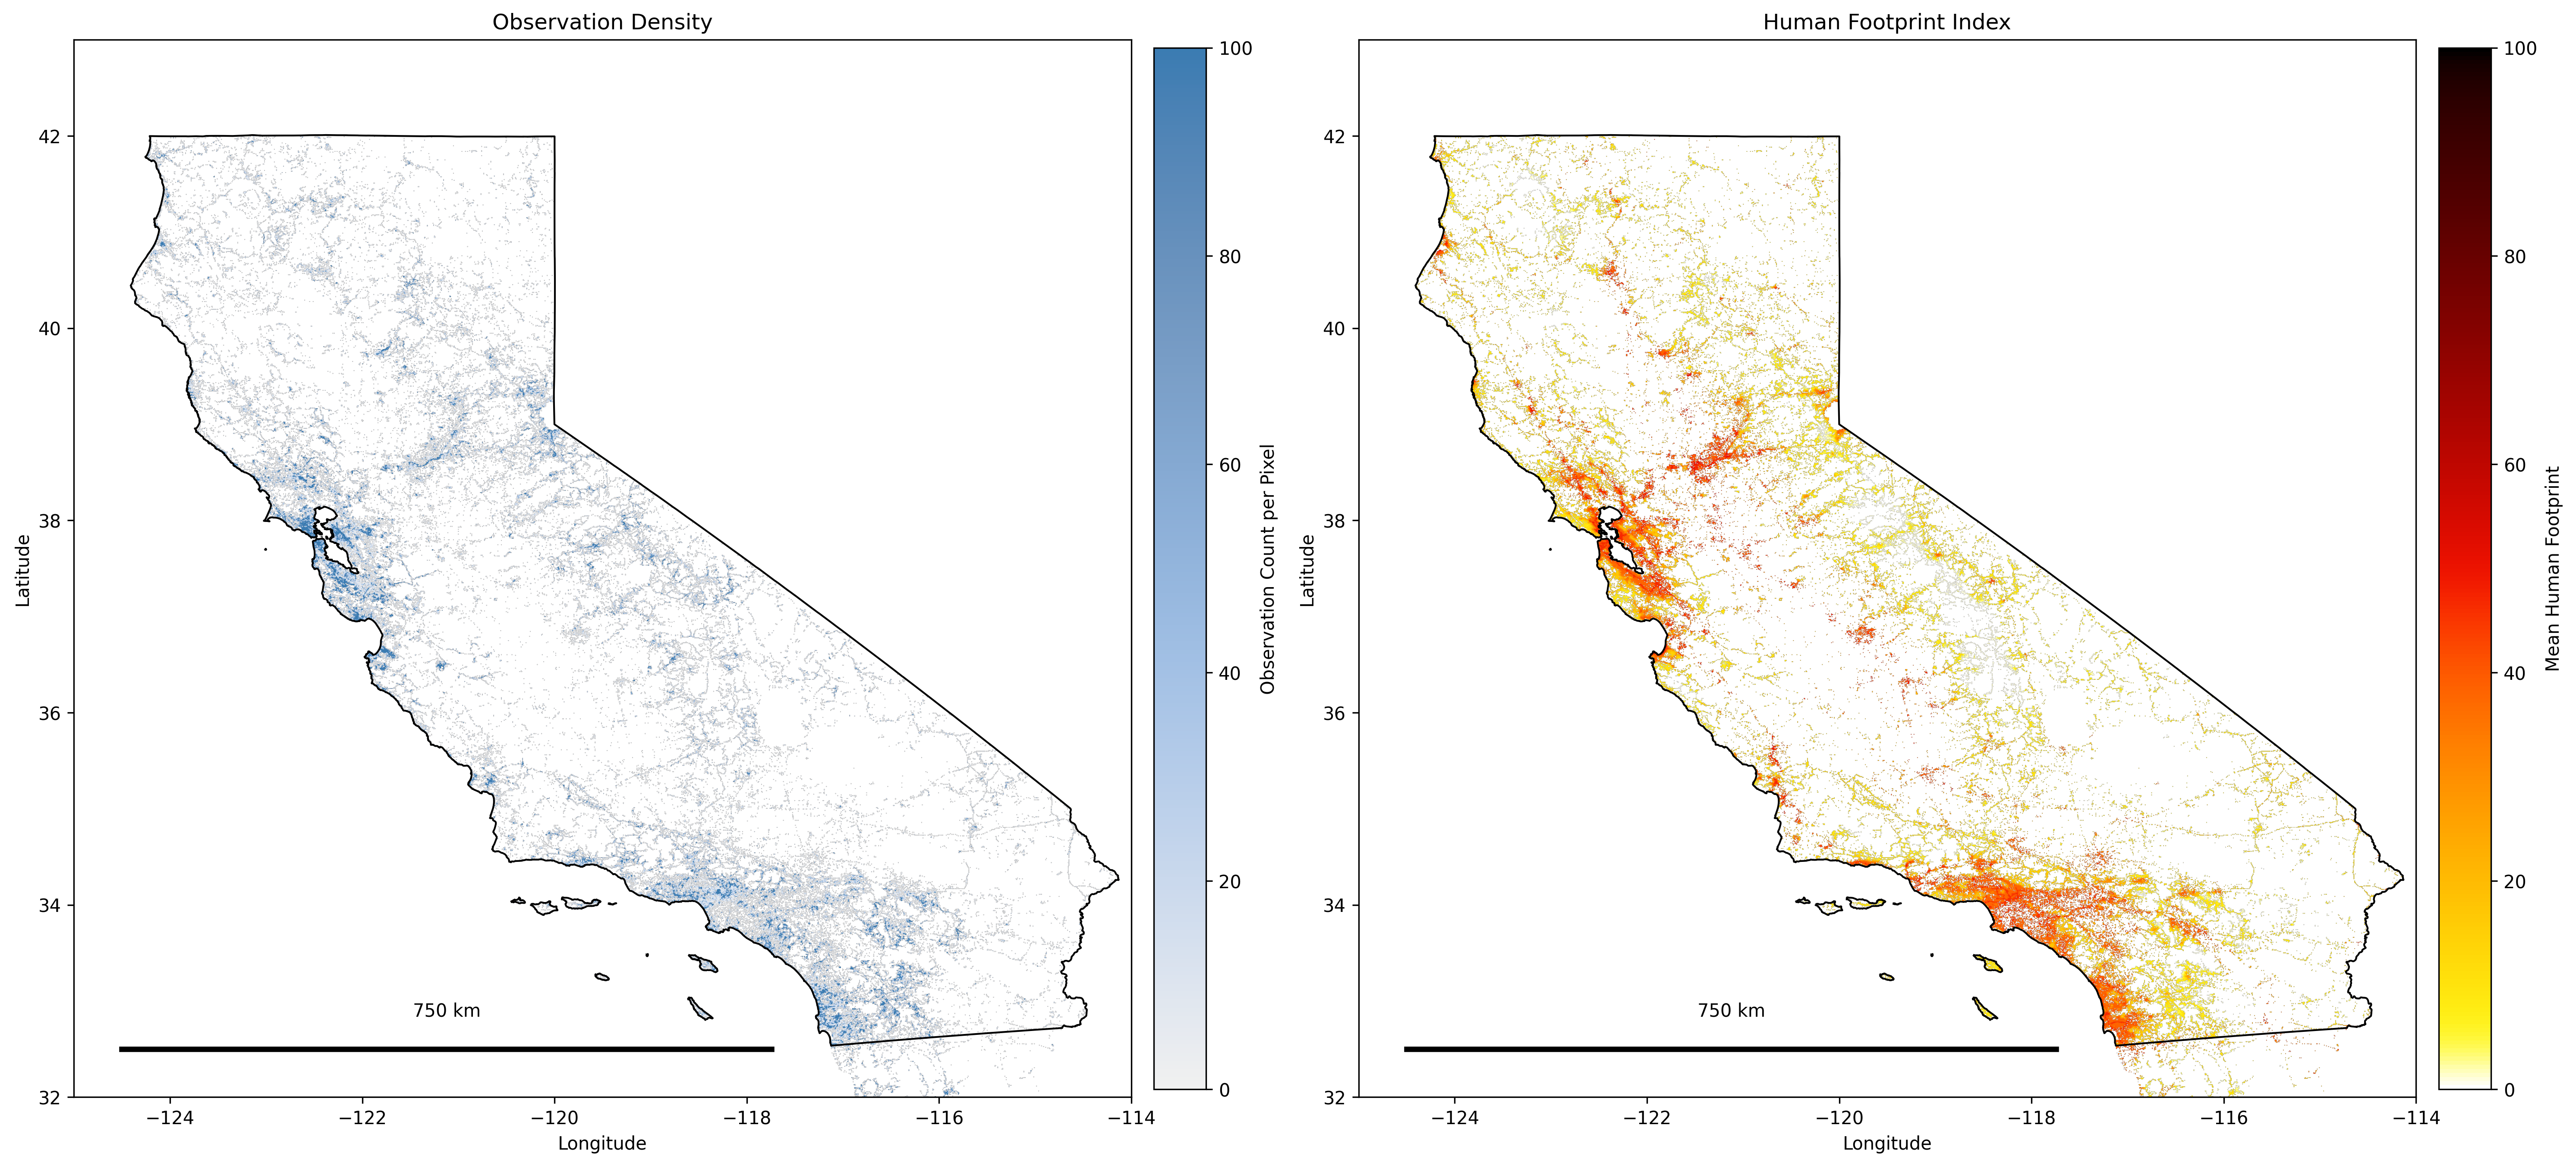

In [74]:
# Create canvas for both plots and export
# Create canvas for both plots
canvas = ds.Canvas(plot_width=1500, plot_height=1500,
                   x_range=(-125, -114), y_range=(32, 43))

# Observation Density Aggregation
obs_agg = canvas.points(df_ca, 'longitude', 'latitude', agg=ds.count())
obs_img = shade(obs_agg, cmap=colorcet.blues, span=[0, 100], how="linear")

# Human Footprint Aggregation
hfp_agg = canvas.points(df_ca, 'longitude', 'latitude', agg=ds.mean('human_footprint'))
reversed_fire = list(reversed(colorcet.fire))
hfp_img = shade(hfp_agg, cmap=reversed_fire, span=[0, 100], how="linear")

# Set up the figure with 2 subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(20, 10), dpi=300)

# ---- Left: Observation Density ----
california.boundary.plot(ax=axes[0], edgecolor='black', linewidth=1.0)
axes[0].imshow(obs_img.to_pil(), extent=[-125, -114, 32, 43])
axes[0].set_title("Observation Density")
axes[0].set_xlabel("Longitude")
axes[0].set_ylabel("Latitude")
axes[0].grid(False)

# Add colorbar for Observation Density
obs_cmap = cc.cm['blues']
obs_norm = mcolors.Normalize(vmin=0, vmax=100)
obs_sm = plt.cm.ScalarMappable(cmap=obs_cmap, norm=obs_norm)
obs_sm.set_array([])
cbar1 = fig.colorbar(obs_sm, ax=axes[0], orientation="vertical", fraction=0.046, pad=0.02)
cbar1.set_label("Observation Count per Pixel", fontsize=10)

# ---- Right: Human Footprint ----
california.boundary.plot(ax=axes[1], edgecolor='black', linewidth=1.0)
axes[1].imshow(hfp_img.to_pil(), extent=[-125, -114, 32, 43])
axes[1].set_title("Human Footprint Index")
axes[1].set_xlabel("Longitude")
axes[1].set_ylabel("Latitude")
axes[1].grid(False)

# Add colorbar for Human Footprint
reversed_cmap = mcolors.ListedColormap(reversed_fire)
hfp_norm = mcolors.Normalize(vmin=0, vmax=100)
hfp_sm = plt.cm.ScalarMappable(cmap=reversed_cmap, norm=hfp_norm)
hfp_sm.set_array([])
cbar2 = fig.colorbar(hfp_sm, ax=axes[1], orientation="vertical", fraction=0.046, pad=0.02)
cbar2.set_label("Mean Human Footprint", fontsize=10)

# Add scale bars to both plots
add_scale_bar(axes[0], length_km=750)
add_scale_bar(axes[1], length_km=750)

plt.tight_layout()
plt.savefig("combined_observation_and_footprint.png", bbox_inches='tight', dpi=300)
plt.show()